In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
import pylab as pl




Pregunta 1: Convolución Discreta



Si $$h=[h[0],h[1],\dots,h[N-1]] $$ es el vector de la respuesta impulsional, entonces la matriz de la convolución circular es 
\begin{equation}
C_h=\begin{bmatrix}
h[0] & 0 & \dots & 0 \\
h[1] & h[0] & \dots & 0\\
\vdots & \vdots & \ddots & \vdots\\
h[N-1] & h[N-2] & \dots & h[0]\\
0 & 0 & \dots & h[N-1]
\end{bmatrix}
\end{equation}

y

\begin{equation}
C_h^0=\begin{bmatrix}
h[0] & h[N-1] & \dots & h[1] \\
h[1] & h[0] & \dots & h[2]\\
\vdots & \vdots & \ddots & \vdots\\
h[N-1] & h[N-2] & \dots & h[0]
\end{bmatrix}
\end{equation}




Pregunta 2: Transformadas de Fourier Discreta (DFT) y Rápida (FFT)

2.1 Funciones básicas y transformada discreta de Fourier (DFT)

Notar que la matriz de Fourier está dada por

\begin{equation}
F_N=
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & e^{i 2\pi/N} & e^{i 4\pi/N} & \cdots & e^{i (N-1)2\pi/N} \\
1 & e^{i 4\pi/N} & e^{i 8\pi/N} & \cdots & e^{i (N-1)2\pi/N} \\
\vdots & \vdots & \vdots & \cdots & \vdots  \\
1 & e^{i (N-1)2\pi/N} & e^{i (N-1)4\pi/N} &  \cdots &  e^{i (N-1)(N-1)2\pi/N}
\end{bmatrix}
\end{equation}

Text(0, 0.5, 'amplitud parte imaginaria')

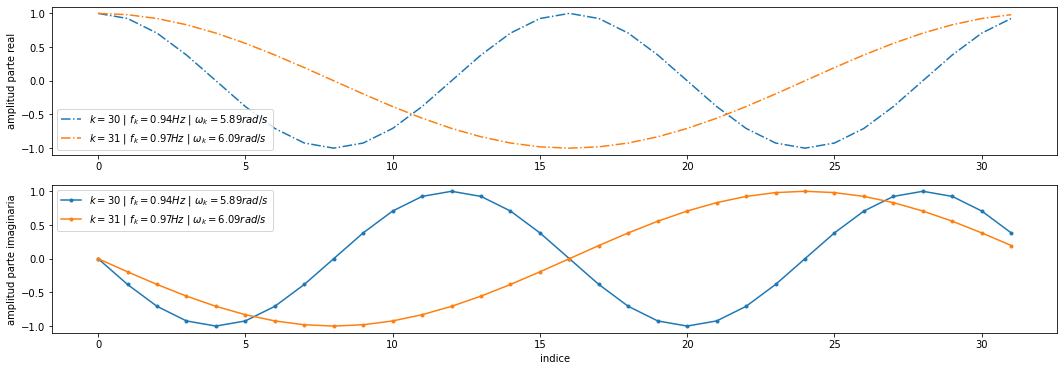

In [ ]:
N=32
fig, axes =plt.subplots(2,1, figsize=(18,6))
t=np.arange(0,N,1)
for k in range(N-2,N):
  fk=k/N
  wk=2*np.pi*fk
  ek=np.exp(1j*wk*t)
  o1=axes[0].plot(t,np.real(ek),'-.',label=f'$k={k}$ | $f_k={fk:.2f} Hz$ | $\omega_k={wk:.2f} rad/s$')
  o2=axes[1].plot(t,np.imag(ek),'.-',label=f'$k={k}$ | $f_k={fk:.2f} Hz$ | $\omega_k={wk:.2f} rad/s$')


axes[0].legend()
axes[0].set_ylabel('amplitud parte real')
axes[1].legend()
axes[1].set_xlabel('indice')
axes[1].set_ylabel('amplitud parte imaginaria')

In [ ]:
N=5
FN=np.zeros(shape=(N,N),dtype=np.complex)
omegaN= np.exp(1j*2*np.pi/N)
for i in range(N):
  for j in range(N):
    FN[i,j]=omegaN**(i*j)

print(FN)

[[ 1.        +0.j          1.        +0.j          1.        +0.j
   1.        +0.j          1.        +0.j        ]
 [ 1.        +0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
  -0.80901699-0.58778525j  0.30901699-0.95105652j]
 [ 1.        +0.j         -0.80901699+0.58778525j  0.30901699-0.95105652j
   0.30901699+0.95105652j -0.80901699-0.58778525j]
 [ 1.        +0.j         -0.80901699-0.58778525j  0.30901699+0.95105652j
   0.30901699-0.95105652j -0.80901699+0.58778525j]
 [ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
  -0.80901699+0.58778525j  0.30901699+0.95105652j]]


In [ ]:
F5=scipy.linalg.dft(5)
F5

array([[ 1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ],
       [ 1.        +0.j        ,  0.30901699-0.95105652j,
        -0.80901699-0.58778525j, -0.80901699+0.58778525j,
         0.30901699+0.95105652j],
       [ 1.        +0.j        , -0.80901699-0.58778525j,
         0.30901699+0.95105652j,  0.30901699-0.95105652j,
        -0.80901699+0.58778525j],
       [ 1.        +0.j        , -0.80901699+0.58778525j,
         0.30901699-0.95105652j,  0.30901699+0.95105652j,
        -0.80901699-0.58778525j],
       [ 1.        +0.j        ,  0.30901699+0.95105652j,
        -0.80901699+0.58778525j, -0.80901699-0.58778525j,
         0.30901699-0.95105652j]])

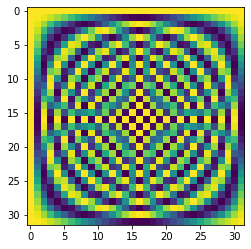

In [ ]:
F32=scipy.linalg.dft(32)
pl.imshow(np.real(F32))

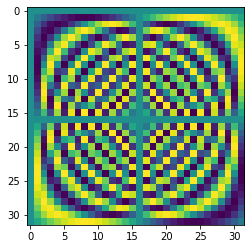

In [ ]:

pl.imshow(np.imag(F32))

In [ ]:
def getxHat(N,f0):
  w0=2*np.pi*f0
  t= np.arange(0,N,1)
  x= np.sin(w0*t)
  Fn=scipy.linalg.dft(N)
  xHat= (1/N)*Fn.dot(x)
  w=np.arange(-1/2,1/2,1/N)

  return t, x, w, xHat, w0




Text(0.5, 0, 'indice frecuencial')

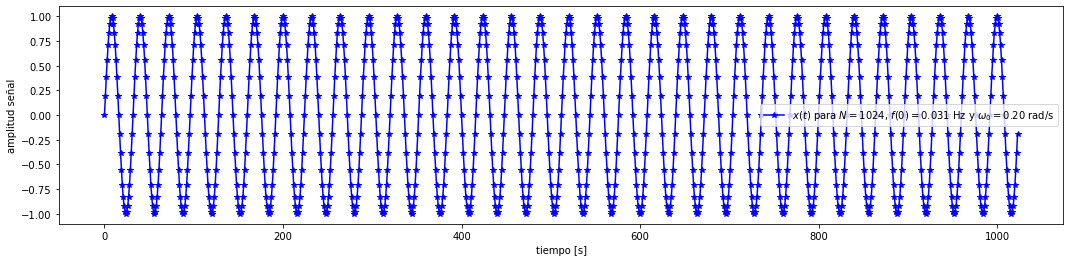

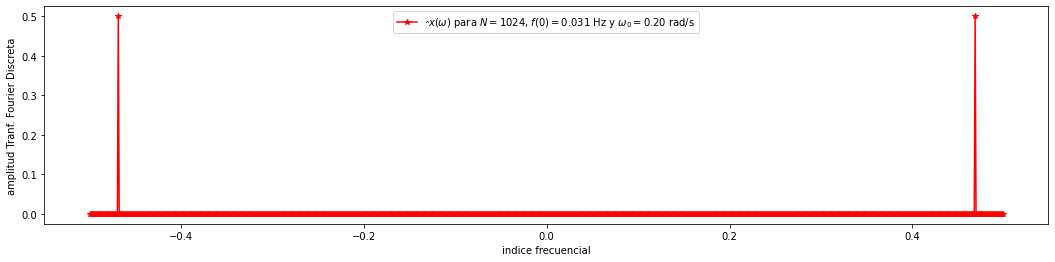

In [ ]:
N=1024
k=32
f0=k/N

t, x, w, xHat, w0 = getxHat(N,f0)

pl.figure(figsize=(18,4))
pl.plot(t,x,'b-*',label=f'$x(t)$ para $N={N}$, $f(0)={f0:.3f}$ Hz y $\omega_0={w0:.2f}$ rad/s')
pl.legend()
pl.ylabel('amplitud señal')
pl.xlabel('tiempo [s]')

pl.figure(figsize=(18,4))
pl.plot(w,np.abs(xHat),'r-*', label=f'$\hat x(\omega)$ para $N={N}$, $f(0)={f0:.3f}$ Hz y $\omega_0={w0:.2f}$ rad/s')
pl.legend()
pl.ylabel('amplitud Tranf. Fourier Discreta')
plt.xlabel('indice frecuencial')


Pregunta 4 Filtraje Ideal

Sampling rate= 16000


Text(0, 0.5, 'amplitud señal')

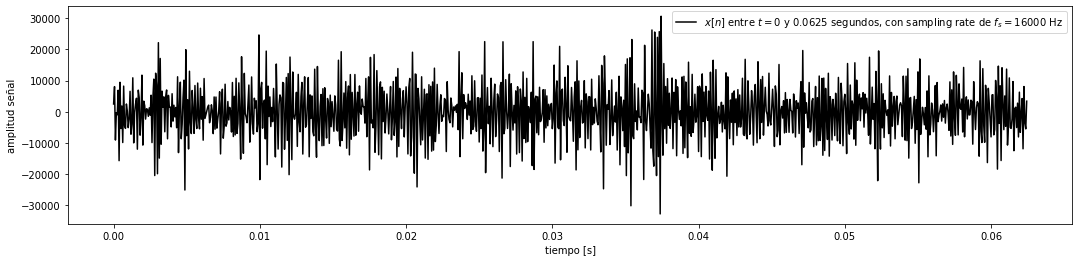

In [ ]:
fs, x = wavfile.read('/home/data/TP3_data_stairwayb.wav')
print(f"Sampling rate= {fs}")

pl.figure(figsize=(18,4))
K=1000
t=np.arange(0,len(x)/fs,1/fs)

pl.plot(t[:K],x[:K],'k-',label=f'$x[n]$ entre $t=0$ y ${K/fs}$ segundos, con sampling rate de $f_s={fs}$ Hz')
plt.legend()
pl.xlabel('tiempo [s]')
pl.ylabel('amplitud señal')


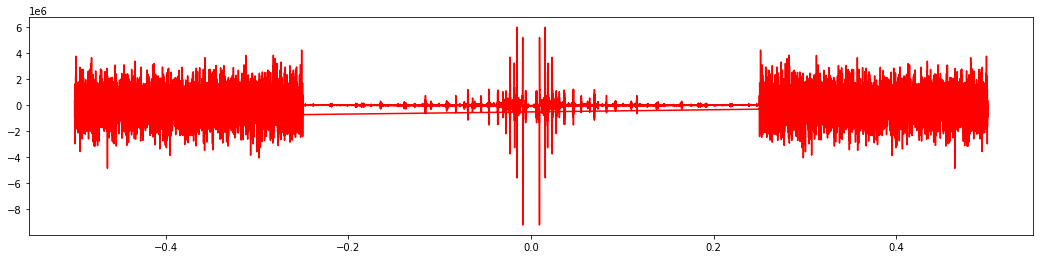

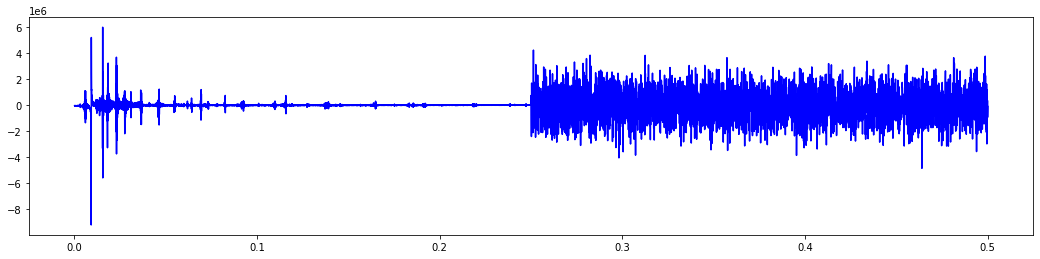

In [ ]:
n=2**14
xHat=np.fft.fft(x,n)
freq=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq,xHat.real,'r-')

pl.figure(figsize=(18,4))
pl.plot(freq[int(n/2):],xHat.real[int(n/2):],'b-')


(16384,)


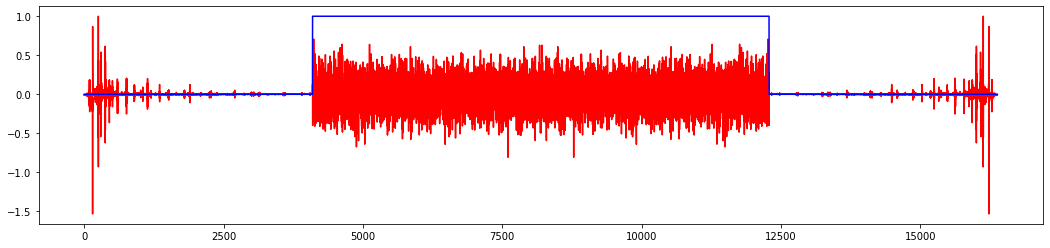

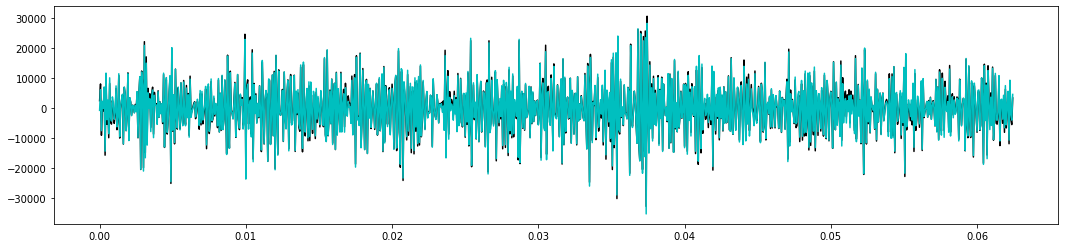

In [ ]:
fc=0.25
Nc=int(fc*n)
window=np.ones(n)
window[0:Nc]=0
window[n-Nc:]=0
print(window.shape)

pl.figure(figsize=(18,4))
pl.plot(xHat.real/np.max(xHat.real),'r-')
pl.plot(window, 'b-')
xHatFilt=np.multiply(xHat,window)
xFilt=np.fft.ifft(xHatFilt)

pl.figure(figsize=(18,4))
pl.plot(t[:K],x[:K],'k-')
pl.plot(t[:K],xFilt[:K].real,'c-')


In [ ]:
wavfile.write(filename='/home/data/stairwayfilt.wav',rate=fs,data=x/x.max())